##  Описание проекта:
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 
### Цель исследования: 
1. Определение рыночной стоимости данных объектов недвижимости.
2. Определение факторов, влияющих на рыночную стоимость объектов.

### Ход исследования: 
Путь к файлу, с которым я буду работать: /datasets/real_estate_data.csv. После загрузки данных и их обзора, я проверю все данные на пропуски и аномалии, посмотрю, как они влиют на сами данные.
Далее, на этапе предобработки, я удалю эти пропуски и аномалии, изменю типы данных там, где в этом есть необходимость. После добавлю в таблицу новые столбцы для упрощения работы на этапе исследовательского анализа данных. И, наконец, на финальном этапе-исследовательском анализе, я изучу рад параметров и факторы, влияющие на продажу квартир, после чего смогу сделать выводы и выполнить вышеуказанные цели моего проекта.

Таким образом, работа будет поделена на несколько частей:
1. Обзор данных
2. Предобработка данных.
3. Добавление в таблицу новвых столбоц.
4. Исследовательский анализ данных.

In [1]:
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('C:\\Users\\37544\\Downloads\\real_estate_data.csv')
    
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

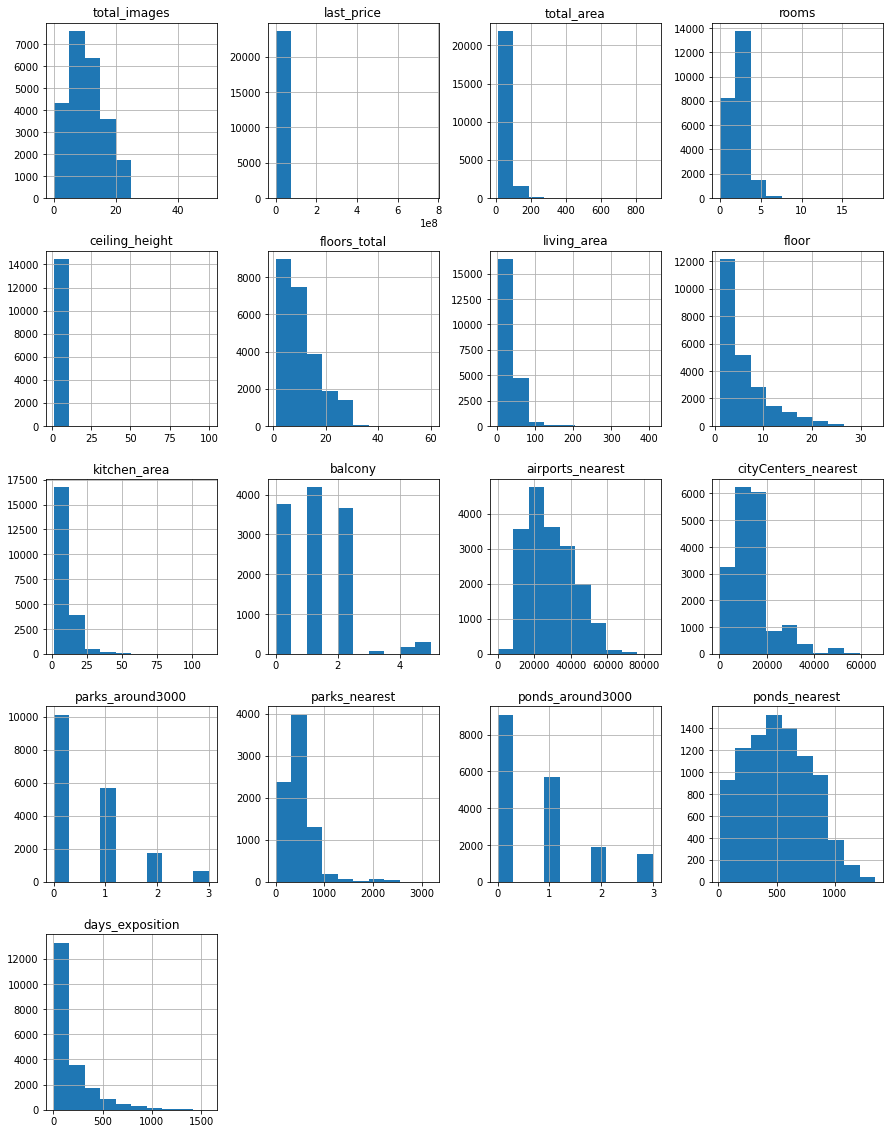

In [4]:
data.hist(figsize=(15,20))
plt.show()

### 2 шаг. Предобработка данных 

In [5]:
# 1. Найдём и изучим пропущенные значения в столбцах:

data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [7]:
# Заполненим пропусков на 0
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# Удаление пустых значений
data['is_apartment'] = data['is_apartment'].fillna(False)


Эта ошибки могли быть допущены по невнимательности

In [8]:
# Удаление записей, где отсутствуют локация и этажи
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# Заполнение высоты потолков медианным значением
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# Заполнение высоты потолков медианным значением
#ceiling_height_median = data.groupby(['floors_total'])['ceiling_height'].transform('median')
#data['ceiling_height'].fillna(ceiling_height_median, inplace=True)

# Почему при обработке через transform остается один пропуск в ceiling heught?


# Заменяем пропущеные значения в days_exposition на среднее значение
data['days_exposition'] = data.groupby('locality_name')['days_exposition'].apply(lambda x: x.fillna(x.mean()))
data['days_exposition'].fillna(data['days_exposition'].mean(), inplace=True)



/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [9]:
# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

In [10]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

Возможными причинами неполноты данных могут быть: ошибки и изменения на площадках-источниках данных, сбои и ошибки в работе инструментов, осуществляющих сбор данных, и т.д.

In [11]:
# 2. Изменение типа данных

data['balcony']=data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['last_price'] = data['last_price'].astype('int')


Мы изменяем тип данных на int, потому что он быстрее в арифметический вычислениях и позволяет нам сравнивать данные(что невозможно в float из-за процессии). + в данном датафрейме есть много мест, где плавающая точка просто не нужна.

In [12]:
# 3. Удаление дубликатов

data.duplicated().sum()

# Явных дубликатов нету

0

In [13]:
# Обработка неявных дубликатов в названии населённых пунктов

n = ['деревня', 'поселок', 'посёлок', 'городского типа', 'городской', 'село', 'при железнодорожной', 'станции', 'садовое', 'садоводческое некоммерческое' 'товарищество']
for elem in n:
    data['locality_name'] = data['locality_name'].str.replace(elem, '').str.strip()
print(data['locality_name'].unique())
len(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'товарищество Новая Ропша' 'Павловск' 'Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи'
 'Аннино' 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги'

308

Данные с пропусками, которые нельзя обрезать через query: airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, days_exposition

In [14]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

In [15]:
# Устранение редких и выбивающих значений

# 1. число фотографий квартиры в объявлении
data = data.query('total_images < 26')
# 2. цена на момент снятия с публикации
data = data.query('last_price < 8750000.0')
# 3. общая площадь квартиры в квадратных метрах (м²)
data = data.query('total_area <= 90')
# 4. жилая площадь в квадратных метрах (м²)
data = data.query('living_area < 60')
# 5. площадь кухни в квадратных метрах (м²)
data = data.query('kitchen_area < 15.6')
# 6. высота потолков (м)
data = data.query('2.3 < ceiling_height < 2.9')

0.25    2.52
0.50    2.60
0.75    2.70
Name: ceiling_height, dtype: float64

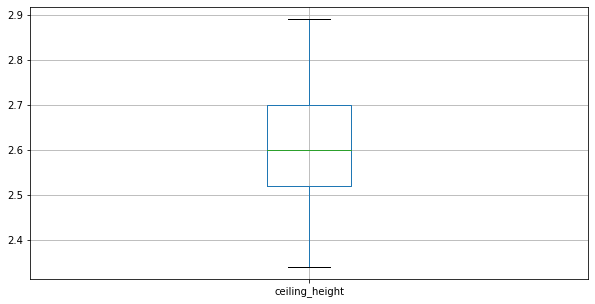

In [16]:
data.boxplot(figsize=(10, 5), column = 'ceiling_height')
data['ceiling_height'].quantile([0.25,0.5,0.75])

Всё делалось вручную, каждый столбец был проверен через ящик с усами и квартили.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17118 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          17118 non-null  int64  
 1   last_price            17118 non-null  int64  
 2   total_area            17118 non-null  float64
 3   first_day_exposition  17118 non-null  object 
 4   rooms                 17118 non-null  int64  
 5   ceiling_height        17118 non-null  float64
 6   floors_total          17118 non-null  int64  
 7   living_area           17118 non-null  float64
 8   floor                 17118 non-null  int64  
 9   is_apartment          17118 non-null  bool   
 10  studio                17118 non-null  bool   
 11  open_plan             17118 non-null  bool   
 12  kitchen_area          17118 non-null  float64
 13  balcony               17118 non-null  int64  
 14  locality_name         17118 non-null  object 
 15  airports_nearest   

Вывод: В данных достаточно много выбросов и в процессе их удаления датасет стал на 26% меньше, что вполне нормально для дальнейшей работы с ним.

### 3 шаг. Добавление в таблицу новых столбцов.

1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [18]:
# Добавим цену на один квадратный метр (sqr_met_price)
data['sqr_met_price'] = data['last_price'] / data['total_area']
data['sqr_met_price'].astype('int')
# Добавим день недели объявдения публикации
data['first_day_exposition'].astype('datetime64[M]') 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#Тип этажа квартиры 
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_group, axis=1)
# Расстоянние до центра города в км 
data['city_centre_km'] = round(data['cityCenters_nearest'] / 1000, )    

В таблицу были добавлены цена на один квадратный метр, дни недели(день, неделя, год), тип этажа квартиры и расстояние до центра города в км.

### 4 шаг. Проведение исследовательского анализа данных

#### 4.1 Изучение следующих параметров.

1. общая площадь;
2. жилая площадь;
3. площадь кухни;
4. цена объекта;
5. количество комнат;
6. высота потолков;
7. этаж квартиры;
8. тип этажа квартиры («первый», «последний», «другой»);
9. общее количество этажей в доме;
10. расстояние до центра города в метрах;
11. расстояние до ближайшего аэропорта;
12. расстояние до ближайшего парка;
13. день и месяц публикации объявления.

Наибольшие по площади результаты:
16439    90.0
21029    90.0
22596    90.0
11853    90.0
9279     90.0
16206    90.0
11257    90.0
2187     90.0
17422    90.0
16984    90.0
Name: total_area, dtype: float64


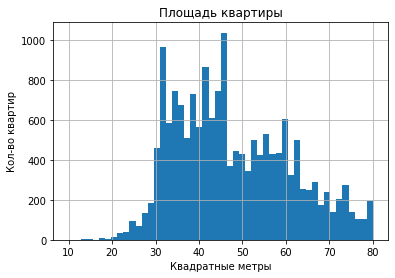

In [19]:
# 1. Общая площадь
data['total_area'].hist(bins=50, range=(10, 80))
plt.title('Площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
print('Наибольшие по площади результаты:')
print(data['total_area'].sort_values(ascending=False).head(10))



Большинство квартир меньше 80^2, были аномально большие значения, но мы их удалили. Чаще всего встречаются квартиры с площадью 32-48 м^2.

Наибольшие по площади результаты:
20480    59.9
20744    59.6
7835     59.5
21487    59.1
18528    59.0
16311    59.0
7969     59.0
41       59.0
7193     59.0
19086    59.0
Name: living_area, dtype: float64


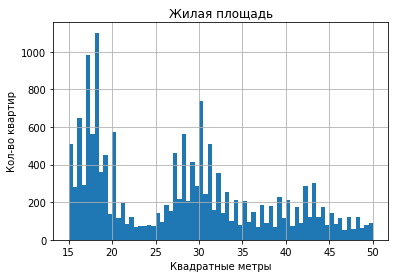

In [20]:
# 2. жилая площадь
data['living_area'].hist(bins=70, range=(15,50))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
print('Наибольшие по площади результаты:')
print(data['living_area'].sort_values(ascending=False).head(10))

Жилая площадь больше 40м^2 встречается достаточно редко. Больше всего квартир с жилой площадью от 15м^2 до 22м^2.

Наибольшие по площади результаты:
8152     15.581639
21555    15.581639
20397    15.570000
13963    15.550000
573      15.500000
1577     15.500000
10115    15.500000
15174    15.500000
7184     15.500000
8740     15.500000
Name: kitchen_area, dtype: float64


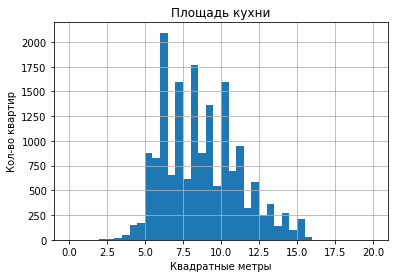

In [21]:
# 3. Площадь кухни
data['kitchen_area'].hist(bins=40, range=(0,20))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
print('Наибольшие по площади результаты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

После удаления выбросов, значения выше 12м^2 почти не встречаются. Больше всего квартир с кухней от 6 до 8 м^2.

Наибольшие по цене варианты:
12745    8740000
2347     8721680
4110     8721680
8927     8700000
19201    8700000
20438    8700000
5341     8700000
17606    8700000
20943    8700000
1359     8700000
Name: last_price, dtype: int64


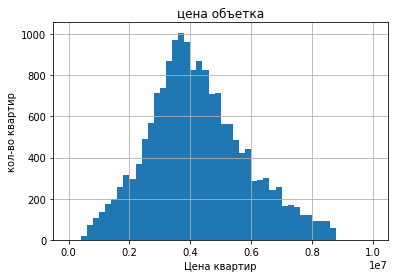

In [22]:
# 4. цена объекта
data['last_price'].hist(bins=50, range=(0,10000000))
plt.title('цена объетка')
plt.xlabel('Цена квартир')
plt.ylabel('кол-во квартир')
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))



В основ стоимость квартир от 3 миллионов до 4 милионнов.

Больше всего комнат
2333     5
15010    5
12186    5
20893    5
12827    5
11223    5
23305    5
14771    5
2737     5
20398    5
Name: rooms, dtype: int64


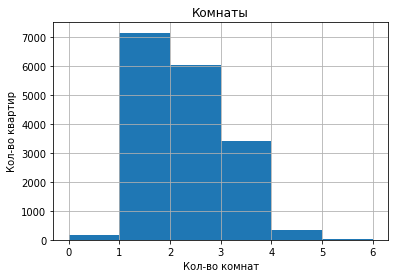

In [23]:
#5. количество комнат;
data['rooms'].hist(bins=6, range=(0, 6))
plt.title('Комнаты')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')
print('Больше всего комнат')
print(data['rooms'].sort_values(ascending=False).head(10))


Чаще всего встречаются двухкомнатные и трёхкомнатные квартиры. 

Наибольшие по высоте варианты:
20571    2.89
11344    2.88
22208    2.88
2253     2.88
14321    2.88
13709    2.88
19764    2.88
17181    2.88
20842    2.88
15307    2.88
Name: ceiling_height, dtype: float64


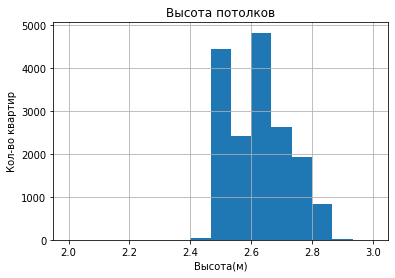

In [24]:
# 6. высота потолков;
data['ceiling_height'].hist(bins=15, range=(2,3))
plt.title('Высота потолков')
plt.xlabel('Высота(м)')
plt.ylabel('Кол-во квартир')
print('Наибольшие по высоте варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Чаще всего встречаются квартиры с высотой потолков в 2.5m и 2.7m

Самые высокие этажи:
6157     27
7711     27
23292    27
2629     27
13276    27
4091     27
113      27
16644    27
9799     26
15053    26
Name: floor, dtype: int64


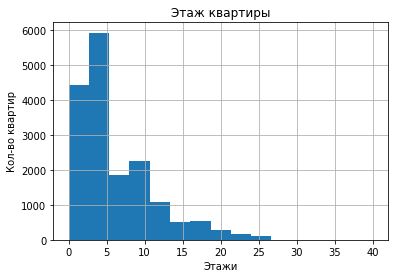

In [25]:
# 7. этаж квартиры;
data['floor'].hist(bins=15, range=(0, 40))
plt.title('Этаж квартиры')
plt.xlabel('Этажи')
plt.ylabel('Кол-во квартир')
print('Самые высокие этажи:')
print(data['floor'].sort_values(ascending=False).head(10))

Чаще всего встречаются квартиры до 5 этажа, далее, чем выше этаж, тем реже встречаются квартиры.

Text(0, 0.5, 'Кол-во квартир')

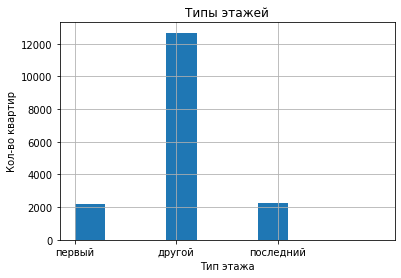

In [26]:
# 8. тип этажа квартиры («первый», «последний», «другой»);
data['floor_type'].hist(bins=10, range=(0, 3))
plt.title('Типы этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Кол-во квартир')

Кол-во квартир на первом и последнем почти одинаково. Больше всего квартир, находящихся на других этажах(что логично)

Самые высокоэтажные здания: 
2253     60
16731    52
15982    35
871      35
2966     35
7236     35
4855     35
13975    35
22946    35
5808     35
Name: floors_total, dtype: int64


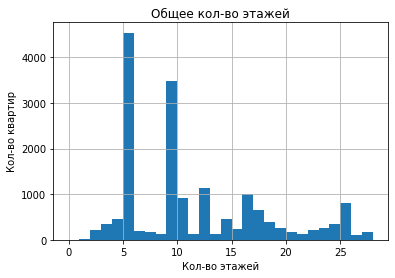

In [27]:
# 9. общее количество этажей в доме;
data['floors_total'].hist(bins=28, range=(0, 28))
plt.title('Общее кол-во этажей')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во квартир')
print('Самые высокоэтажные здания: ')
print(data['floors_total'].sort_values(ascending=False).head(10))

Чаще всего встречаются 5-ти и 9-ти этажные здания.

Самое большое расстояние до центра: 
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: cityCenters_nearest, dtype: float64


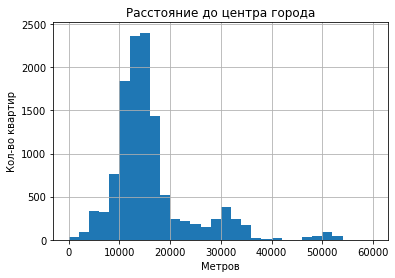

In [28]:
# 10. расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins=30, range=(0,60000))
plt.title('Расстояние до центра города')
plt.xlabel('Метров')
plt.ylabel('Кол-во квартир')
print('Самое большое расстояние до центра: ')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))

Чаще всего встречаются квартиры, которые находятся от 10к метров до 18к метров от центра. Чем дальше от центра, тем реже встречаются квартиры.

Самое большое расстояние: 
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64


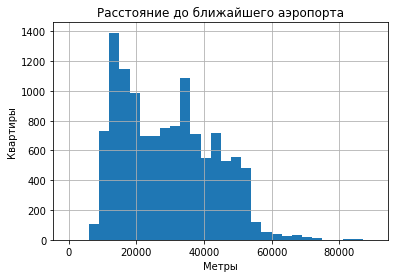

In [29]:
# 11. расстояние до ближайшего аэропорта
data['airports_nearest'].hist(bins=30, range=(0, 90000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Квартиры')
print('Самое большое расстояние: ')
print(data['airports_nearest'].sort_values(ascending=False).head(10))

Дальше 55000м до аэропорта квартир становится резко меньше. В основном, больше всего квартир находятся в 20000м от аэропорта.

Самое большое расстояние: 
19430    3190.0
10959    3190.0
1590     3064.0
23080    2984.0
1860     2888.0
7855     2880.0
6625     2633.0
18685    2532.0
8393     2467.0
18488    2427.0
Name: parks_nearest, dtype: float64


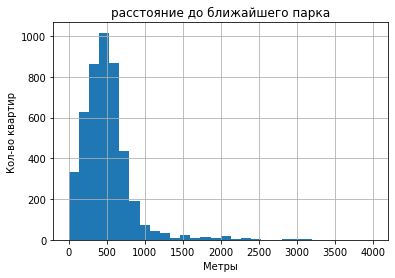

In [30]:
# 12. расстояние до ближайшего парка
data['parks_nearest'].hist(bins=30, range=(0, 4000))
plt.title('расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Кол-во квартир')
print('Самое большое расстояние: ')
print(data['parks_nearest'].sort_values(ascending=False).head(10))

В основном, все квартиры находятся до 800м от парков. Квартир, которые находятся от парка дальше, чем 800м, очень мало.

Text(0, 0.5, 'Кол-во квартир')

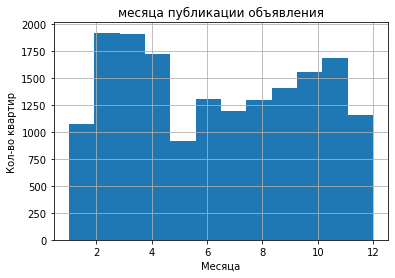

In [31]:
# 13.1. месяц публикации объявления.

data['month'].hist(bins=12, range=(1, 12))
plt.title('месяца публикации объявления')
plt.xlabel('Месяца')
plt.ylabel('Кол-во квартир')

В посленовогоднее время появляется наибольшее количество квартир. К маю публикаций становится резко меньше.  Далее, с наступлением лета, кол-во объявлений расстёт, что объясяется тем, что студенты, которые живут в городе, заканчивают ссесию и временно возвращаются домой, из-за чего на рынке появляется большое кол-во свободных квартир.

Text(0, 0.5, 'Кол-во квартир')

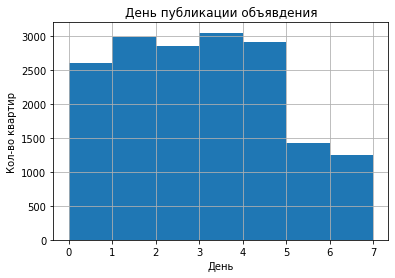

In [32]:
# 13.2 день публикации объявления.
data['weekday'].hist(bins=7, range=(0, 7))
plt.title('День публикации объявдения')
plt.xlabel('День')
plt.ylabel('Кол-во квартир')


В будние дни кол-во публикаций практически схожи. Заметное уменьшение кол-во публикаций наблюдается в выходные дни, что, в принципе, логично.

#### 4.2 Как быстро продавались квартиры(days_exposition)

Средний день продажи:  165.64721812553643
Медианное значение дней продаж:  105.0


count    17118.000000
mean       165.647218
std        190.451533
min          1.000000
25%         45.000000
50%        105.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

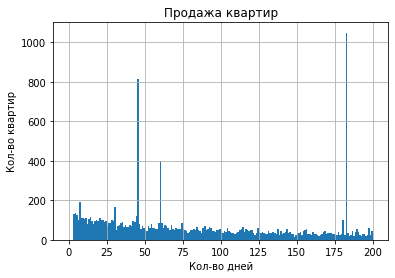

In [33]:
data['days_exposition'].hist(bins=200, range=(0, 200))
plt.title('Продажа квартир')
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во квартир')
print('Средний день продажи: ', data['days_exposition'].mean())
print('Медианное значение дней продаж: ', data['days_exposition'].median())
data['days_exposition'].describe() 

5. Комментарий студента: уменьшил range и увеличил bins. Появились некоторый аномалии(не знаю, с чем могут быть связаны), но думаю, они несущественные.

Ранее я не убирал пустые значение в days_exposition, но на этом этапе подумал, что почему бы нет. Я заменил их на медианное через transform, но осталось совсем немного пропусков. Не знаю, что с ними делать, решил оставить.

Вывод: Быстрыми продажами мы можем назвать все те, что находятся до Q2(90 дней). Самые быстрые-44дня(Q1). Их очень много. Далее с каждым месяцем квартир становится всё больше. Долгими можно назвать все те, что пытаются сдать долше 180 дней(Q3). Есть и те, что могут сдаваться несколько лет, но мы не можем гарантировать, что это просто выбросы.

#### 4.3 какие факторы больше всего влияют на общую (полную) стоимость объекта? last_price
1. общей площади; total_area
2. жилой площади; living_area
3. площади кухни; kitchen_area 
4. количества комнат; rooms
5. этажа, на котором расположена квартира (первый, последний, другой); floor_type
6. даты размещения (день недели, месяц, год). 

0.5820509855879724

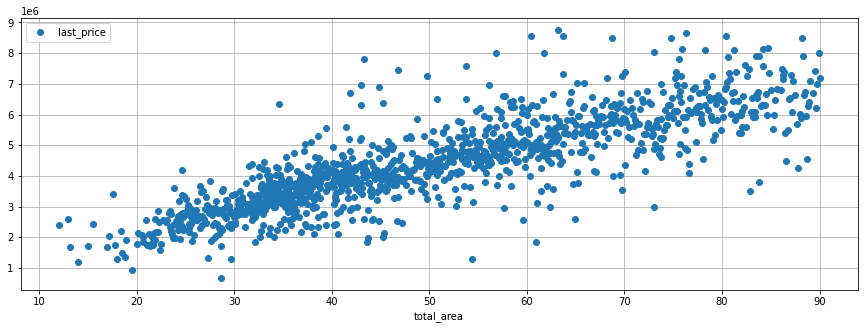

In [34]:
# 1 Зависимость цены от общей площади; total_area
data.pivot_table(index=['total_area'], values=['last_price']).plot(grid=True, style='o',figsize=(15, 5))
data['last_price'].corr(data['total_area'], method='pearson')

На графике видно, что цена растёт взависимости от площади. Присутствует достаточно сильная зависимость двух переменных. 

5. Комментарий студента: Случайно удалил ваш комментарий, где упоминалось отсутсвие отображения корреляции, но я всё добавил и упомянул в выводе.

0.45717276710101307

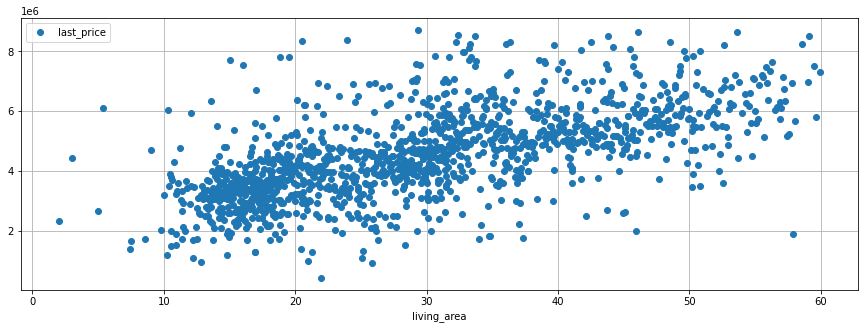

In [35]:
# 2. зависимость цены от жилой площади; living_area
data.pivot_table(index=['living_area'], values=['last_price']).plot(grid=True, style='o',figsize=(15, 5))
data['last_price'].corr(data['living_area'])

Чем больше жилая площадь, тем выше цена, но зависимость не такая резкая, как с общей площадью. Это заметно по r=46.(-1 - отсутствие зависимости, +1 - полная зависимость).

0.42410117912008716

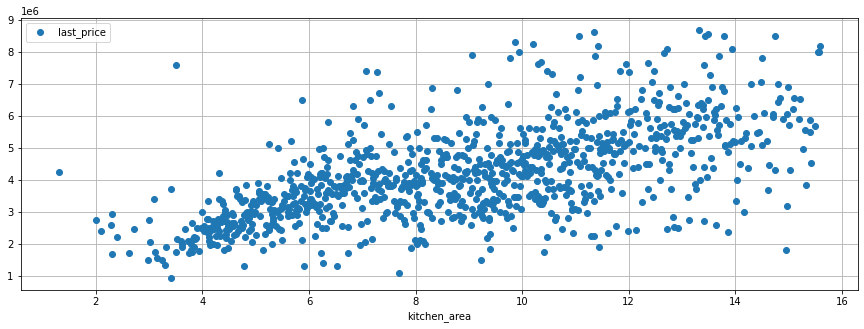

In [36]:
# 3. площади кухни; kitchen_area
data.pivot_table(index=['kitchen_area'], values=['last_price']).plot(grid=True, style='o', figsize=(15, 5))
data['last_price'].corr(data['kitchen_area'])

С площадью кухни до определенного момента растёт и цена, но после 8м^2 цена почти не растёт. Зависимость присутствует(r=42), но не самая большая.

0.3628780081003677

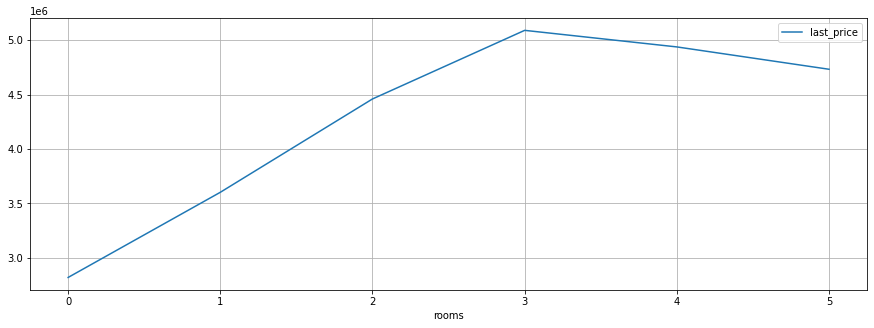

In [37]:
# 4. количества комнат; rooms
data.pivot_table(index=['rooms'], values=['last_price']).plot(grid=True, figsize=(15, 5))
data['last_price'].corr(data['rooms'])

От однокомнатной и двухкомнатной квартиры цена резко растёт, после- постепенно снижается. Зависимость присутствует, но не самая большая(r=36)

<AxesSubplot:xlabel='floor_type'>

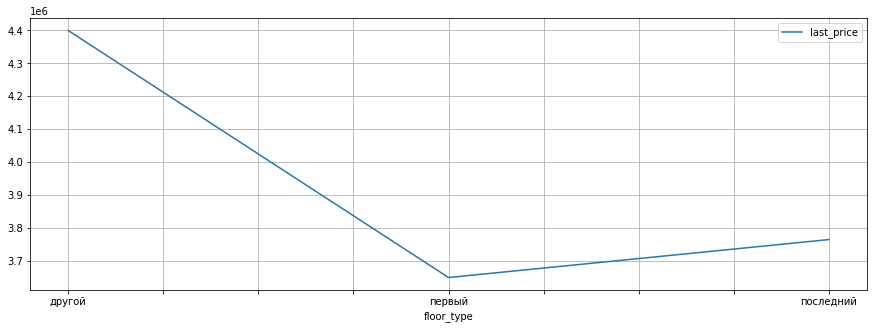

In [38]:
# 5. этажа, на котором расположена квартира (первый, последний, другой); floor_type 
data.pivot_table(index=['floor_type'], values=['last_price']).plot(grid=True,figsize=(15, 5))

Цена на первые этажи самая низкая, на последний-чуть выше, самые высокие цены имеют другие квартиры(их цена обоснована другими факторами, такими как: кол-во комнат, площадь и тд.)

-0.012530405276703275

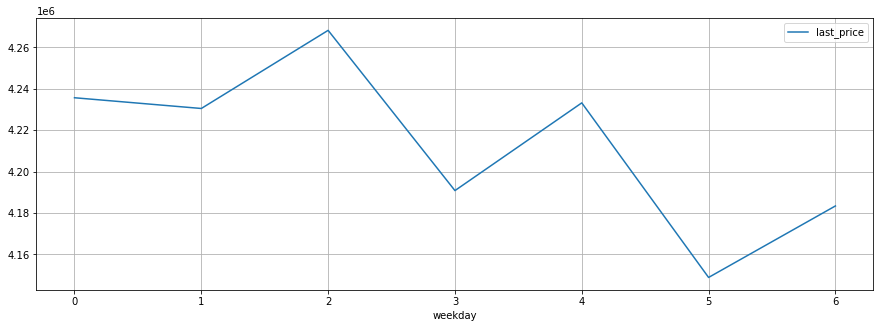

In [39]:
# 6.1 цена от размещения по дням
data.pivot_table(index=['weekday'], values=['last_price']).plot(grid=True,figsize=(15, 5))
data['last_price'].corr(data['weekday'])

В будние дни цена варьируется не особо заметно, но виден резкий спад в субботу, к воскресенью же возвращается. Зависимости нету.

-0.0019151100170507601

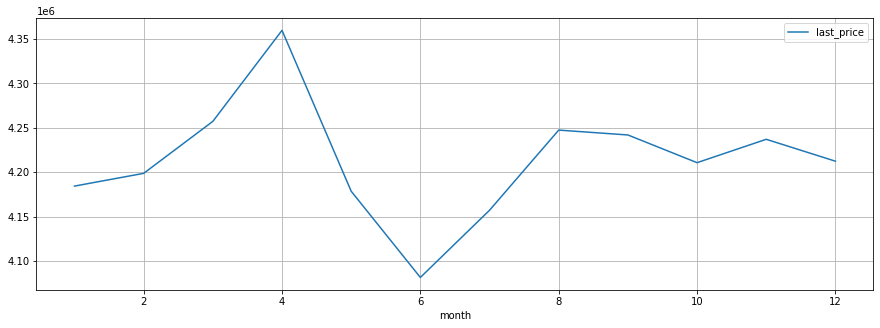

In [40]:
# 6.2 цена от размещения по месяцам
data.pivot_table(index=['month'], values=['last_price']).plot(grid=True,figsize=(15, 5))
data['last_price'].corr(data['month'])

Цена резко падает к началу лета, потому что спроси резко падает(думаю, как и ранее, из-за студентов, которые съезжают со съемных квартир), далее цена восстанавливается и падает только к концу года. Зависимости нету.

0.03535859971082794

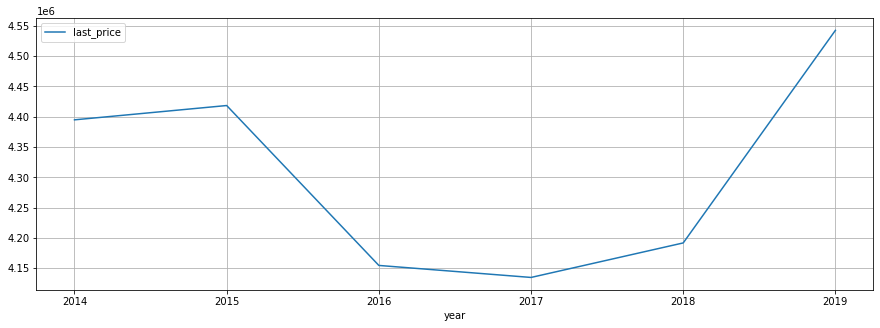

In [41]:
# 6.3 Цена размещения по годам 
data.pivot_table(index=['year'], values=['last_price']).plot(grid=True,figsize=(15, 5))
data['last_price'].corr(data['year'])

в 2016 и 2017 цены очен низкие, но к 2018 и 2019 году цена резко растёт. (Не знаю, что могло поспособствовать этому)

#### 4.4 Средняя цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 


In [42]:
ten_city = data['locality_name'].value_counts().head(10)
city_sqr_met_price = data.query('locality_name in (@ten_city.index)').pivot_table(values='sqr_met_price', index='locality_name')
city_sqr_met_price.sort_values('sqr_met_price', ascending=False)


,sqr_met_price
locality_name,
Санкт-Петербург,103088.491079
Пушкин,99100.259225
Кудрово,95481.989146
Парголово,91096.889181
Мурино,86319.679353
Шушары,78398.377217
Колпино,75087.698865
Гатчина,68686.272792
Всеволожск,66856.720092


Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Выборге и Всеволожске, из которых далеко ехать до Санкт-Петербурга.

In [43]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,10155,4650000.0
Мурино,550,3369000.0
Шушары,411,3900000.0
Кудрово,410,3742500.0
Всеволожск,346,3300000.0
Колпино,297,3500000.0
Парголово,295,4050000.0
Пушкин,270,4525000.0
Гатчина,259,3050000.0


#### 4.4 Вычисляем среднюю цену каждого километра.

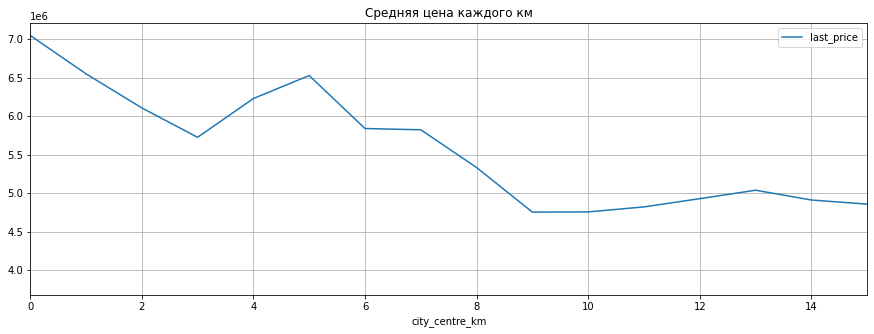

In [44]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centre_km', values='last_price')\
    .plot(grid=True, xlim=(0,15), figsize=(15, 5), title = 'Средняя цена каждого км');


Центральная зона - это 7 км и меньше. Дальше 7 км цена на квартиры снижается.

### 5. Общие выводы по проекту:

5.1.  Срок продажи квартиры
Медианное значение продажи квартиры - 105 дней. Если 45(Q1) и меньше дней, то это очень быстрые продажи, если дольше 196(Q3) дней - это долгие продажы. Есть большое число квартир, проданных всего за несколько дней после публикации. Также есть варианты, которые продавались несколько десятков месяцев.

5.2.  Факторы, влияющие на стоимость
На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные. Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

5.3.  Стоимость квадратного метра в топ-10 населённых пунктов
Дороже всего квадратный метр в Санкт-Петербурге - 103519.Дешевле всего квадратный метр в Выборге- 57338.

5.4.  Факторы, влияющие на стоимость в центре Санкт-Петербурга
В центре города практически нет разницы, насколько квартира удалена от условного центра города. В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города. В центре есть очень дорогие однокомнатные квартиры Экономическая ситуация в стране мало влияет на элитную недвижимость в центре